In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages

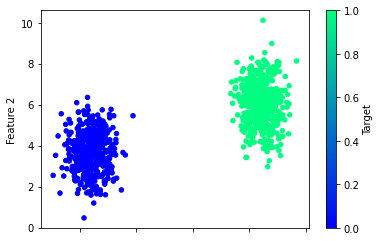

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 176us/sample - loss: 0.8869 - acc: 0.0280
Epoch 2/100
750/750 [==============================] - 0s 55us/sample - loss: 0.8651 - acc: 0.0080
Epoch 3/100
750/750 [==============================] - 0s 48us/sample - loss: 0.8451 - acc: 0.0080
Epoch 4/100
750/750 [==============================] - 0s 45us/sample - loss: 0.8279 - acc: 0.0133
Epoch 5/100
750/750 [==============================] - 0s 43us/sample - loss: 0.8123 - acc: 0.0160
Epoch 6/100
750/750 [==============================] - 0s 44us/sample - loss: 0.7986 - acc: 0.0240
Epoch 7/100
750/750 [==============================] - 0s 47us/sample - loss: 0.7863 - acc: 0.0253
Epoch 8/100
750/750 [==============================] - 0s 47us/sample - loss: 0.7753 - acc: 0.0333
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.7654 - acc: 0.0373
Epoch 10/100
750/750 [==============================] - 0s 48us/sample - loss: 0.7565 - acc: 0.0467
Epoch 11

750/750 [==============================] - 0s 41us/sample - loss: 0.1779 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1740 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 44us/sample - loss: 0.1704 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 44us/sample - loss: 0.1668 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1634 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 45us/sample - loss: 0.1600 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1567 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1536 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 44us/sample - loss: 0.1505 - acc: 1.0000
Epoch 92/100
750/750 [==============================] - 0s 45us/sample - loss: 0.1475 - acc: 1.0000
Epoch 93/100


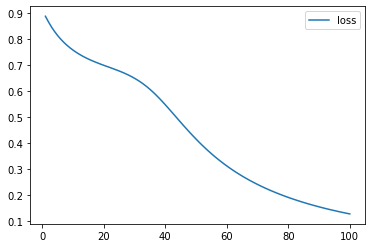

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [12]:
# Plot the accuracy
# history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.1176 - acc: 1.0000
Loss: 0.11757673001289368, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

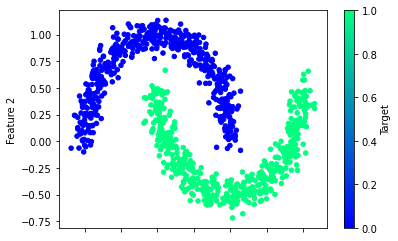

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 49us/sample - loss: 1.1068 - acc: 0.3853
Epoch 2/100
750/750 [==============================] - 0s 40us/sample - loss: 1.0089 - acc: 0.4027
Epoch 3/100
750/750 [==============================] - 0s 45us/sample - loss: 0.9372 - acc: 0.4253
Epoch 4/100
750/750 [==============================] - 0s 48us/sample - loss: 0.8874 - acc: 0.4427
Epoch 5/100
750/750 [==============================] - 0s 44us/sample - loss: 0.8497 - acc: 0.4547
Epoch 6/100
750/750 [==============================] - 0s 47us/sample - loss: 0.8216 - acc: 0.4693
Epoch 7/100
750/750 [==============================] - 0s 48us/sample - loss: 0.7979 - acc: 0.4827
Epoch 8/100
750/750 [==============================] - 0s 53us/sample - loss: 0.7789 - acc: 0.5027
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.7625 - acc: 0.5173
Epoch 10/100
750/750 [==============================] - 0s 45us/sample - loss: 0.7482 - acc: 0.5307
Epoch 11/

750/750 [==============================] - 0s 47us/sample - loss: 0.4796 - acc: 0.7400
Epoch 84/100
750/750 [==============================] - 0s 43us/sample - loss: 0.4776 - acc: 0.7440
Epoch 85/100
750/750 [==============================] - 0s 43us/sample - loss: 0.4756 - acc: 0.7493
Epoch 86/100
750/750 [==============================] - 0s 43us/sample - loss: 0.4734 - acc: 0.7493
Epoch 87/100
750/750 [==============================] - 0s 44us/sample - loss: 0.4713 - acc: 0.7533
Epoch 88/100
750/750 [==============================] - 0s 41us/sample - loss: 0.4691 - acc: 0.7533
Epoch 89/100
750/750 [==============================] - 0s 44us/sample - loss: 0.4668 - acc: 0.7587
Epoch 90/100
750/750 [==============================] - 0s 44us/sample - loss: 0.4647 - acc: 0.7600
Epoch 91/100
750/750 [==============================] - 0s 43us/sample - loss: 0.4625 - acc: 0.7613
Epoch 92/100
750/750 [==============================] - 0s 45us/sample - loss: 0.4603 - acc: 0.7627
Epoch 93/100


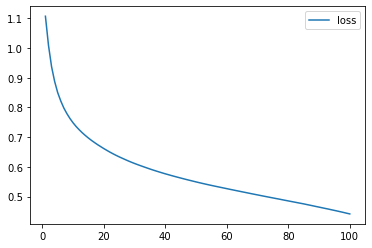

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [19]:
# Plot the loss
# history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
750/750 [==============================] - 0s 327us/sample - loss: 0.7061 - acc: 0.3067
Epoch 2/100
750/750 [==============================] - 0s 65us/sample - loss: 0.6613 - acc: 0.4520
Epoch 3/100
750/750 [==============================] - 0s 67us/sample - loss: 0.6216 - acc: 0.5933
Epoch 4/100
750/750 [==============================] - 0s 100us/sample - loss: 0.5853 - acc: 0.6400
Epoch 5/100
750/750 [==============================] - 0s 89us/sample - loss: 0.5531 - acc: 0.6893
Epoch 6/100
750/750 [==============================] - 0s 97us/sample - loss: 0.5246 - acc: 0.7320
Epoch 7/100
750/750 [==============================] - 0s 95us/sample - loss: 0.4989 - acc: 0.7680
Epoch 8/100
750/750 [==============================] - 0s 102us/sample - loss: 0.4760 - acc: 0.7920
Epoch 9/100
750/750 [==============================] - 0s 93us/sample - loss: 0.4557 - acc: 0.8120
Epoch 10/100
750/750 [==============================] - 0s 101us/sample - loss: 0.4373 - acc: 0.8213
Epoch

750/750 [==============================] - 0s 119us/sample - loss: 0.2032 - acc: 0.9120
Epoch 83/100
750/750 [==============================] - 0s 122us/sample - loss: 0.2020 - acc: 0.9120
Epoch 84/100
750/750 [==============================] - 0s 123us/sample - loss: 0.2008 - acc: 0.9147
Epoch 85/100
750/750 [==============================] - 0s 141us/sample - loss: 0.1996 - acc: 0.9147
Epoch 86/100
750/750 [==============================] - 0s 143us/sample - loss: 0.1983 - acc: 0.9160
Epoch 87/100
750/750 [==============================] - 0s 135us/sample - loss: 0.1972 - acc: 0.9160
Epoch 88/100
750/750 [==============================] - 0s 144us/sample - loss: 0.1960 - acc: 0.9160
Epoch 89/100
750/750 [==============================] - 0s 146us/sample - loss: 0.1948 - acc: 0.9160
Epoch 90/100
750/750 [==============================] - 0s 140us/sample - loss: 0.1936 - acc: 0.9160
Epoch 91/100
750/750 [==============================] - 0s 142us/sample - loss: 0.1923 - acc: 0.9160
Epo

# 19.3.3 encoding categorical variables

In [23]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Fiji               4
Holland            4
Dubai              3
Sweden             3
Sarawak            3
Finland            3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64

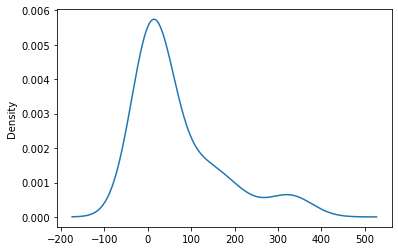

In [24]:
# Visualize the value counts
country_counts.plot.density()

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [26]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [29]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [31]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [32]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


# 19.4.2 Deep Learning Model

In [33]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()


In [35]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [37]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [39]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 19.4.4 Deep Learning Model Design

In [40]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit and train the model

In [42]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
1102/1102 [==============================] - 0s 358us/sample - loss: 2637.4210 - acc: 0.1724
Epoch 2/100
1102/1102 [==============================] - 0s 103us/sample - loss: 1302.0831 - acc: 0.1724
Epoch 3/100
1102/1102 [==============================] - 0s 94us/sample - loss: 388.2455 - acc: 0.1724
Epoch 4/100
1102/1102 [==============================] - 0s 93us/sample - loss: 48.7735 - acc: 0.6098
Epoch 5/100
1102/1102 [==============================] - 0s 102us/sample - loss: 19.7294 - acc: 0.7468
Epoch 6/100
1102/1102 [==============================] - 0s 102us/sample - loss: 11.0545 - acc: 0.7650
Epoch 7/100
1102/1102 [==============================] - 0s 86us/sample - loss: 6.4003 - acc: 0.7813
Epoch 8/100
1102/1102 [==============================] - 0s 94us/sample - loss: 4.0555 - acc: 0.7949
Epoch 9/100
1102/1102 [==============================] - 0s 94us/sample - loss: 2.8242 - acc: 0.7967
Epoch 10/100
1102/1102 [==============================] - 0s 103us/sample - 

1102/1102 [==============================] - 0s 101us/sample - loss: 0.4619 - acc: 0.8285
Epoch 82/100
1102/1102 [==============================] - 0s 102us/sample - loss: 0.4617 - acc: 0.8285
Epoch 83/100
1102/1102 [==============================] - 0s 104us/sample - loss: 0.4614 - acc: 0.8285
Epoch 84/100
1102/1102 [==============================] - 0s 96us/sample - loss: 0.4612 - acc: 0.8285
Epoch 85/100
1102/1102 [==============================] - 0s 101us/sample - loss: 0.4609 - acc: 0.8285
Epoch 86/100
1102/1102 [==============================] - 0s 107us/sample - loss: 0.4607 - acc: 0.8285
Epoch 87/100
1102/1102 [==============================] - 0s 98us/sample - loss: 0.4605 - acc: 0.8285
Epoch 88/100
1102/1102 [==============================] - 0s 96us/sample - loss: 0.4603 - acc: 0.8285
Epoch 89/100
1102/1102 [==============================] - 0s 97us/sample - loss: 0.4601 - acc: 0.8285
Epoch 90/100
1102/1102 [==============================] - 0s 91us/sample - loss: 0.4600 - 

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

368/368 - 0s - loss: 0.8459 - acc: 0.8641
Loss: 0.8458688777426014, Accuracy: 0.864130437374115


# Logistic Regression vs Basic NN

In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [46]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [48]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
576/576 [==============================] - 0s 443us/sample - loss: 0.7399 - acc: 0.4861
Epoch 2/100
576/576 [==============================] - 0s 92us/sample - loss: 0.6996 - acc: 0.5347
Epoch 3/100
576/576 [==============================] - 0s 87us/sample - loss: 0.6663 - acc: 0.5903
Epoch 4/100
576/576 [==============================] - 0s 87us/sample - loss: 0.6389 - acc: 0.6476
Epoch 5/100
576/576 [==============================] - 0s 83us/sample - loss: 0.6147 - acc: 0.7049
Epoch 6/100
576/576 [==============================] - 0s 85us/sample - loss: 0.5938 - acc: 0.7535
Epoch 7/100
576/576 [==============================] - 0s 78us/sample - loss: 0.5762 - acc: 0.7552
Epoch 8/100
576/576 [==============================] - 0s 84us/sample - loss: 0.5594 - acc: 0.7552
Epoch 9/100
576/576 [==============================] - 0s 91us/sample - loss: 0.5460 - acc: 0.7483
Epoch 10/100
576/576 [==============================] - 0s 116us/sample - loss: 0.5337 - acc: 0.7622
Epoch 1

576/576 [==============================] - 0s 101us/sample - loss: 0.4193 - acc: 0.8073
Epoch 83/100
576/576 [==============================] - 0s 90us/sample - loss: 0.4191 - acc: 0.8090
Epoch 84/100
576/576 [==============================] - 0s 79us/sample - loss: 0.4188 - acc: 0.8090
Epoch 85/100
576/576 [==============================] - 0s 75us/sample - loss: 0.4186 - acc: 0.8073
Epoch 86/100
576/576 [==============================] - 0s 78us/sample - loss: 0.4179 - acc: 0.8090
Epoch 87/100
576/576 [==============================] - 0s 108us/sample - loss: 0.4175 - acc: 0.8073
Epoch 88/100
576/576 [==============================] - 0s 121us/sample - loss: 0.4171 - acc: 0.8073
Epoch 89/100
576/576 [==============================] - 0s 99us/sample - loss: 0.4168 - acc: 0.8056
Epoch 90/100
576/576 [==============================] - 0s 128us/sample - loss: 0.4169 - acc: 0.8038
Epoch 91/100
576/576 [==============================] - 0s 123us/sample - loss: 0.4164 - acc: 0.8073
Epoch 92

# 19.5.3 Vector Machine vs Deep Learning

In [49]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()


,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [50]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()
# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [51]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [54]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Create the SVM model
svm = SVC(kernel='linear')

In [56]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [58]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy =nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
22857/22857 [==============================] - ETA: 0s - loss: 0.4805 - acc: 0.791 - 4s 170us/sample - loss: 0.4802 - acc: 0.7921
Epoch 2/50
22857/22857 [==============================] - 4s 181us/sample - loss: 0.3724 - acc: 0.8735
Epoch 3/50
22857/22857 [==============================] - 3s 113us/sample - loss: 0.3690 - acc: 0.8735
Epoch 4/50
22857/22857 [==============================] - 2s 106us/sample - loss: 0.3678 - acc: 0.8735
Epoch 5/50
22857/22857 [==============================] - 4s 180us/sample - loss: 0.3667 - acc: 0.8735
Epoch 6/50
22857/22857 [==============================] - 4s 172us/sample - loss: 0.3661 - acc: 0.8733
Epoch 7/50
22857/22857 [==============================] - 4s 192us/sample - loss: 0.3657 - acc: 0.8733
Epoch 8/50
22857/22857 [==============================] - 4s 184us/sample - loss: 0.3653 - acc: 0.8731
Epoch 9/50
22857/22857 [==============================] - 3s 147us/sample - loss: 0.3649 - acc: 0.8733
Epoch 10/50
22857/22857 [==========

# 19.5.4 Random Forest vs Deep Learning

In [61]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()


,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [62]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [63]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [64]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()


,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [67]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Random forest predictive accuracy: 0.849


In [68]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
27317/27317 [==============================] - 5s 195us/sample - loss: 0.4317 - acc: 0.8331
Epoch 2/50
27317/27317 [==============================] - 5s 172us/sample - loss: 0.3866 - acc: 0.8492
Epoch 3/50
27317/27317 [==============================] - 5s 187us/sample - loss: 0.3821 - acc: 0.8491
Epoch 4/50
27317/27317 [==============================] - 5s 184us/sample - loss: 0.3799 - acc: 0.8496
Epoch 5/50
27317/27317 [==============================] - 6s 206us/sample - loss: 0.3784 - acc: 0.8496
Epoch 6/50
27317/27317 [==============================] - 5s 197us/sample - loss: 0.3768 - acc: 0.8497
Epoch 7/50
27317/27317 [==============================] - 4s 162us/sample - loss: 0.3763 - acc: 0.8498
Epoch 8/50
27317/27317 [==============================] - 4s 142us/sample - loss: 0.3753 - acc: 0.8500
Epoch 9/50
27317/27317 [==============================] - 4s 162us/sample - loss: 0.3743 - acc: 0.8501
Epoch 10/50
27317/27317 [==============================] - 5s 189us/sampl

# 19.6.1 Checkpoints

In [70]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
  544/27317 [..............................] - ETA: 15s - loss: 0.3675 - acc: 0.8548 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1888/27317 [=>............................] - ETA: 10s - loss: 0.3598 - acc: 0.8596
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2528/27317 [=>............................] - ETA: 9s - loss: 0.3666 - acc: 0.8532 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3872/27317 [===>..........................] - ETA: 6s - loss: 0.3671 - acc: 0.8533
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5056/27317 [====>.........................] - ETA: 5s - loss: 0.3654 - acc: 0.8538
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5952/27317 [=====>........................] - ETA: 5s - loss: 0.3641 - acc: 0.8530
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6624/27317 [======>.......................] - ETA: 4s - loss: 0.3656 - acc: 0.8514
Epoch 00001: saving model to checkpoints/weights.01.hd

 3264/27317 [==>...........................] - ETA: 3s - loss: 0.3524 - acc: 0.8591
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4256/27317 [===>..........................] - ETA: 3s - loss: 0.3458 - acc: 0.8630
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5728/27317 [=====>........................] - ETA: 2s - loss: 0.3512 - acc: 0.8598
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6496/27317 [======>.......................] - ETA: 2s - loss: 0.3535 - acc: 0.8584
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7744/27317 [=======>......................] - ETA: 3s - loss: 0.3513 - acc: 0.8594
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8416/27317 [========>.....................] - ETA: 3s - loss: 0.3509 - acc: 0.8590
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9376/27317 [=========>....................] - ETA: 2s - loss: 0.3532 - acc: 0.8570
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10848/27317 [

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6976/27317 [======>.......................] - ETA: 3s - loss: 0.3611 - acc: 0.8524
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8416/27317 [========>.....................] - ETA: 3s - loss: 0.3612 - acc: 0.8521
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8992/27317 [========>.....................] - ETA: 3s - loss: 0.3602 - acc: 0.8520
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10400/27317 [==========>...................] - ETA: 2s - loss: 0.3570 - acc: 0.8542
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11360/27317 [===========>..................] - ETA: 2s - loss: 0.3599 - acc: 0.8524
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12096/27317 [============>.................] - ETA: 2s - loss: 0.3592 - acc: 0.8531
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13536/27317 [=============>................] - ETA: 2s - loss: 0.3583 - acc: 0.8536
Epoch 00005: 

 9888/27317 [=========>....................] - ETA: 2s - loss: 0.3607 - acc: 0.8542
Epoch 00007: saving model to checkpoints/weights.07.hdf5
10880/27317 [==========>...................] - ETA: 2s - loss: 0.3598 - acc: 0.8544
Epoch 00007: saving model to checkpoints/weights.07.hdf5
12128/27317 [============>.................] - ETA: 2s - loss: 0.3611 - acc: 0.8536
Epoch 00007: saving model to checkpoints/weights.07.hdf5
13152/27317 [=============>................] - ETA: 2s - loss: 0.3615 - acc: 0.8539
Epoch 00007: saving model to checkpoints/weights.07.hdf5
13952/27317 [==============>...............] - ETA: 2s - loss: 0.3621 - acc: 0.8530
Epoch 00007: saving model to checkpoints/weights.07.hdf5
14976/27317 [===============>..............] - ETA: 2s - loss: 0.3606 - acc: 0.8537
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16000/27317 [================>.............] - ETA: 2s - loss: 0.3595 - acc: 0.8544
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17056/27317 [

Epoch 00009: saving model to checkpoints/weights.09.hdf5
13344/27317 [=============>................] - ETA: 3s - loss: 0.3501 - acc: 0.8578
Epoch 00009: saving model to checkpoints/weights.09.hdf5
14336/27317 [==============>...............] - ETA: 2s - loss: 0.3516 - acc: 0.8572
Epoch 00009: saving model to checkpoints/weights.09.hdf5
15680/27317 [================>.............] - ETA: 2s - loss: 0.3556 - acc: 0.8547
Epoch 00009: saving model to checkpoints/weights.09.hdf5
16640/27317 [=================>............] - ETA: 2s - loss: 0.3555 - acc: 0.8548
Epoch 00009: saving model to checkpoints/weights.09.hdf5
17664/27317 [==================>...........] - ETA: 2s - loss: 0.3556 - acc: 0.8549
Epoch 00009: saving model to checkpoints/weights.09.hdf5
18912/27317 [===================>..........] - ETA: 1s - loss: 0.3553 - acc: 0.8553
Epoch 00009: saving model to checkpoints/weights.09.hdf5
19744/27317 [====================>.........] - ETA: 1s - loss: 0.3554 - acc: 0.8554
Epoch 00009: 

16256/27317 [================>.............] - ETA: 3s - loss: 0.3581 - acc: 0.8549
Epoch 00011: saving model to checkpoints/weights.11.hdf5
17280/27317 [=================>............] - ETA: 2s - loss: 0.3587 - acc: 0.8545
Epoch 00011: saving model to checkpoints/weights.11.hdf5
18304/27317 [===================>..........] - ETA: 2s - loss: 0.3602 - acc: 0.8535
Epoch 00011: saving model to checkpoints/weights.11.hdf5
19328/27317 [====================>.........] - ETA: 2s - loss: 0.3597 - acc: 0.8541
Epoch 00011: saving model to checkpoints/weights.11.hdf5
20416/27317 [=====================>........] - ETA: 2s - loss: 0.3602 - acc: 0.8535
Epoch 00011: saving model to checkpoints/weights.11.hdf5
21408/27317 [======================>.......] - ETA: 1s - loss: 0.3587 - acc: 0.8543
Epoch 00011: saving model to checkpoints/weights.11.hdf5
22432/27317 [=======================>......] - ETA: 1s - loss: 0.3582 - acc: 0.8541
Epoch 00011: saving model to checkpoints/weights.11.hdf5
23424/27317 [

19072/27317 [===================>..........] - ETA: 1s - loss: 0.3539 - acc: 0.8568
Epoch 00013: saving model to checkpoints/weights.13.hdf5
19936/27317 [====================>.........] - ETA: 1s - loss: 0.3557 - acc: 0.8553
Epoch 00013: saving model to checkpoints/weights.13.hdf5
21120/27317 [======================>.......] - ETA: 1s - loss: 0.3571 - acc: 0.8544
Epoch 00013: saving model to checkpoints/weights.13.hdf5
22080/27317 [=======================>......] - ETA: 0s - loss: 0.3585 - acc: 0.8535
Epoch 00013: saving model to checkpoints/weights.13.hdf5
22784/27317 [========================>.....] - ETA: 0s - loss: 0.3580 - acc: 0.8538
Epoch 00013: saving model to checkpoints/weights.13.hdf5
23840/27317 [=========================>....] - ETA: 0s - loss: 0.3587 - acc: 0.8536
Epoch 00013: saving model to checkpoints/weights.13.hdf5
24928/27317 [==========================>...] - ETA: 0s - loss: 0.3588 - acc: 0.8536
Epoch 00013: saving model to checkpoints/weights.13.hdf5
25920/27317 [

22880/27317 [========================>.....] - ETA: 0s - loss: 0.3579 - acc: 0.8534
Epoch 00015: saving model to checkpoints/weights.15.hdf5
23712/27317 [=========================>....] - ETA: 0s - loss: 0.3569 - acc: 0.8541
Epoch 00015: saving model to checkpoints/weights.15.hdf5
24928/27317 [==========================>...] - ETA: 0s - loss: 0.3568 - acc: 0.8543
Epoch 00015: saving model to checkpoints/weights.15.hdf5
25952/27317 [===========================>..] - ETA: 0s - loss: 0.3574 - acc: 0.8540
Epoch 00015: saving model to checkpoints/weights.15.hdf5
26784/27317 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8535
Epoch 00015: saving model to checkpoints/weights.15.hdf5
27317/27317 [==============================] - 5s 177us/sample - loss: 0.3585 - acc: 0.8533
Epoch 16/100
  608/27317 [..............................] - ETA: 5s - loss: 0.3517 - acc: 0.8520
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1504/27317 [>.............................] - ET

25376/27317 [==========================>...] - ETA: 0s - loss: 0.3568 - acc: 0.8536
Epoch 00017: saving model to checkpoints/weights.17.hdf5
26432/27317 [============================>.] - ETA: 0s - loss: 0.3577 - acc: 0.8533
Epoch 00017: saving model to checkpoints/weights.17.hdf5
27317/27317 [==============================] - 8s 279us/sample - loss: 0.3578 - acc: 0.8531
Epoch 18/100
  288/27317 [..............................] - ETA: 6s - loss: 0.3512 - acc: 0.8576 
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 1120/27317 [>.............................] - ETA: 7s - loss: 0.3443 - acc: 0.8670
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2144/27317 [=>............................] - ETA: 7s - loss: 0.3580 - acc: 0.8563
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3168/27317 [==>...........................] - ETA: 7s - loss: 0.3651 - acc: 0.8516
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4192/27317 [===>..........................] - E

Epoch 20/100
  832/27317 [..............................] - ETA: 5s - loss: 0.3946 - acc: 0.8269
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1952/27317 [=>............................] - ETA: 6s - loss: 0.3768 - acc: 0.8345
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 2816/27317 [==>...........................] - ETA: 6s - loss: 0.3586 - acc: 0.8473
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 3776/27317 [===>..........................] - ETA: 6s - loss: 0.3594 - acc: 0.8493
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4864/27317 [====>.........................] - ETA: 6s - loss: 0.3533 - acc: 0.8532
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 5824/27317 [=====>........................] - ETA: 5s - loss: 0.3522 - acc: 0.8534
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 6880/27317 [======>.......................] - ETA: 5s - loss: 0.3533 - acc: 0.8531
Epoch 00020: saving model to checkpoints/weights.20.hdf5


 3584/27317 [==>...........................] - ETA: 6s - loss: 0.3732 - acc: 0.8454
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4416/27317 [===>..........................] - ETA: 6s - loss: 0.3645 - acc: 0.8508
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5472/27317 [=====>........................] - ETA: 5s - loss: 0.3621 - acc: 0.8516
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 6496/27317 [======>.......................] - ETA: 5s - loss: 0.3644 - acc: 0.8507
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7552/27317 [=======>......................] - ETA: 5s - loss: 0.3605 - acc: 0.8521
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8736/27317 [========>.....................] - ETA: 4s - loss: 0.3617 - acc: 0.8516
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 9536/27317 [=========>....................] - ETA: 4s - loss: 0.3584 - acc: 0.8538
Epoch 00022: saving model to checkpoints/weights.22.hdf5
10784/27317 [

 6880/27317 [======>.......................] - ETA: 2s - loss: 0.3558 - acc: 0.8547
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 7872/27317 [=======>......................] - ETA: 2s - loss: 0.3552 - acc: 0.8547
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 9280/27317 [=========>....................] - ETA: 2s - loss: 0.3519 - acc: 0.8565
Epoch 00024: saving model to checkpoints/weights.24.hdf5
10208/27317 [==========>...................] - ETA: 2s - loss: 0.3524 - acc: 0.8560
Epoch 00024: saving model to checkpoints/weights.24.hdf5
11232/27317 [===========>..................] - ETA: 2s - loss: 0.3540 - acc: 0.8549
Epoch 00024: saving model to checkpoints/weights.24.hdf5
12448/27317 [============>.................] - ETA: 2s - loss: 0.3565 - acc: 0.8537
Epoch 00024: saving model to checkpoints/weights.24.hdf5
13216/27317 [=============>................] - ETA: 2s - loss: 0.3556 - acc: 0.8549
Epoch 00024: saving model to checkpoints/weights.24.hdf5
14496/27317 [

10944/27317 [===========>..................] - ETA: 2s - loss: 0.3566 - acc: 0.8536
Epoch 00026: saving model to checkpoints/weights.26.hdf5
11776/27317 [===========>..................] - ETA: 2s - loss: 0.3567 - acc: 0.8534
Epoch 00026: saving model to checkpoints/weights.26.hdf5
12864/27317 [=============>................] - ETA: 2s - loss: 0.3556 - acc: 0.8539
Epoch 00026: saving model to checkpoints/weights.26.hdf5
13856/27317 [==============>...............] - ETA: 2s - loss: 0.3552 - acc: 0.8540
Epoch 00026: saving model to checkpoints/weights.26.hdf5
14816/27317 [===============>..............] - ETA: 1s - loss: 0.3546 - acc: 0.8545
Epoch 00026: saving model to checkpoints/weights.26.hdf5
15968/27317 [================>.............] - ETA: 1s - loss: 0.3548 - acc: 0.8546
Epoch 00026: saving model to checkpoints/weights.26.hdf5
17088/27317 [=================>............] - ETA: 1s - loss: 0.3523 - acc: 0.8562
Epoch 00026: saving model to checkpoints/weights.26.hdf5
18208/27317 [

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14528/27317 [==============>...............] - ETA: 2s - loss: 0.3552 - acc: 0.8543
Epoch 00028: saving model to checkpoints/weights.28.hdf5
15552/27317 [================>.............] - ETA: 2s - loss: 0.3572 - acc: 0.8533
Epoch 00028: saving model to checkpoints/weights.28.hdf5
16800/27317 [=================>............] - ETA: 2s - loss: 0.3552 - acc: 0.8546
Epoch 00028: saving model to checkpoints/weights.28.hdf5
17600/27317 [==================>...........] - ETA: 2s - loss: 0.3547 - acc: 0.8551
Epoch 00028: saving model to checkpoints/weights.28.hdf5
18688/27317 [===================>..........] - ETA: 1s - loss: 0.3543 - acc: 0.8553
Epoch 00028: saving model to checkpoints/weights.28.hdf5
19744/27317 [====================>.........] - ETA: 1s - loss: 0.3553 - acc: 0.8551
Epoch 00028: saving model to checkpoints/weights.28.hdf5
20640/27317 [=====================>........] - ETA: 1s - loss: 0.3567 - acc: 0.8541
Epoch 00028: 

16992/27317 [=================>............] - ETA: 2s - loss: 0.3589 - acc: 0.8516
Epoch 00030: saving model to checkpoints/weights.30.hdf5
18432/27317 [===================>..........] - ETA: 1s - loss: 0.3571 - acc: 0.8526
Epoch 00030: saving model to checkpoints/weights.30.hdf5
19072/27317 [===================>..........] - ETA: 1s - loss: 0.3579 - acc: 0.8523
Epoch 00030: saving model to checkpoints/weights.30.hdf5
20320/27317 [=====================>........] - ETA: 1s - loss: 0.3594 - acc: 0.8518
Epoch 00030: saving model to checkpoints/weights.30.hdf5
21536/27317 [======================>.......] - ETA: 1s - loss: 0.3598 - acc: 0.8519
Epoch 00030: saving model to checkpoints/weights.30.hdf5
22048/27317 [=======================>......] - ETA: 1s - loss: 0.3595 - acc: 0.8521
Epoch 00030: saving model to checkpoints/weights.30.hdf5
23104/27317 [========================>.....] - ETA: 0s - loss: 0.3581 - acc: 0.8530
Epoch 00030: saving model to checkpoints/weights.30.hdf5
24160/27317 [

19936/27317 [====================>.........] - ETA: 1s - loss: 0.3547 - acc: 0.8539
Epoch 00032: saving model to checkpoints/weights.32.hdf5
20928/27317 [=====================>........] - ETA: 1s - loss: 0.3549 - acc: 0.8537
Epoch 00032: saving model to checkpoints/weights.32.hdf5
21984/27317 [=======================>......] - ETA: 1s - loss: 0.3546 - acc: 0.8543
Epoch 00032: saving model to checkpoints/weights.32.hdf5
23008/27317 [========================>.....] - ETA: 1s - loss: 0.3563 - acc: 0.8532
Epoch 00032: saving model to checkpoints/weights.32.hdf5
24000/27317 [=========================>....] - ETA: 0s - loss: 0.3559 - acc: 0.8533
Epoch 00032: saving model to checkpoints/weights.32.hdf5
25088/27317 [==========================>...] - ETA: 0s - loss: 0.3561 - acc: 0.8534
Epoch 00032: saving model to checkpoints/weights.32.hdf5
26272/27317 [===========================>..] - ETA: 0s - loss: 0.3566 - acc: 0.8534
Epoch 00032: saving model to checkpoints/weights.32.hdf5
27264/27317 [

Epoch 00034: saving model to checkpoints/weights.34.hdf5
23680/27317 [=========================>....] - ETA: 0s - loss: 0.3560 - acc: 0.8540
Epoch 00034: saving model to checkpoints/weights.34.hdf5
24672/27317 [==========================>...] - ETA: 0s - loss: 0.3542 - acc: 0.8549
Epoch 00034: saving model to checkpoints/weights.34.hdf5
25696/27317 [===========================>..] - ETA: 0s - loss: 0.3552 - acc: 0.8543
Epoch 00034: saving model to checkpoints/weights.34.hdf5
26720/27317 [============================>.] - ETA: 0s - loss: 0.3559 - acc: 0.8539
Epoch 00034: saving model to checkpoints/weights.34.hdf5
27317/27317 [==============================] - 7s 272us/sample - loss: 0.3562 - acc: 0.8537
Epoch 35/100
  576/27317 [..............................] - ETA: 5s - loss: 0.3631 - acc: 0.8490
Epoch 00035: saving model to checkpoints/weights.35.hdf5
 1632/27317 [>.............................] - ETA: 6s - loss: 0.3667 - acc: 0.8480
Epoch 00035: saving model to checkpoints/weights.

26528/27317 [============================>.] - ETA: 0s - loss: 0.3560 - acc: 0.8537
Epoch 00036: saving model to checkpoints/weights.36.hdf5
27317/27317 [==============================] - 6s 226us/sample - loss: 0.3563 - acc: 0.8540
Epoch 37/100
   32/27317 [..............................] - ETA: 6s - loss: 0.2992 - acc: 0.8750
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1216/27317 [>.............................] - ETA: 3s - loss: 0.3491 - acc: 0.8553
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1888/27317 [=>............................] - ETA: 3s - loss: 0.3549 - acc: 0.8522
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 2848/27317 [==>...........................] - ETA: 3s - loss: 0.3664 - acc: 0.8462
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4320/27317 [===>..........................] - ETA: 3s - loss: 0.3654 - acc: 0.8470
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4992/27317 [====>.........................] - ET

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 1888/27317 [=>............................] - ETA: 6s - loss: 0.3558 - acc: 0.8496- ETA: 6s - loss: 0.3522 - acc: 0.85
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 2912/27317 [==>...........................] - ETA: 6s - loss: 0.3596 - acc: 0.8503
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3744/27317 [===>..........................] - ETA: 6s - loss: 0.3533 - acc: 0.8534
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 4928/27317 [====>.........................] - ETA: 6s - loss: 0.3480 - acc: 0.8559
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 5824/27317 [=====>........................] - ETA: 5s - loss: 0.3474 - acc: 0.8573
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6848/27317 [======>.......................] - ETA: 5s - loss: 0.3498 - acc: 0.8563
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7808/27317 [=======>......................] - ETA: 5s - loss

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 4384/27317 [===>..........................] - ETA: 6s - loss: 0.3553 - acc: 0.8526
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5408/27317 [====>.........................] - ETA: 6s - loss: 0.3525 - acc: 0.8530
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 6464/27317 [======>.......................] - ETA: 5s - loss: 0.3548 - acc: 0.8518
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 7456/27317 [=======>......................] - ETA: 5s - loss: 0.3579 - acc: 0.8507
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 8480/27317 [========>.....................] - ETA: 5s - loss: 0.3568 - acc: 0.8514
Epoch 00041: saving model to checkpoints/weights.41.hdf5
 9504/27317 [=========>....................] - ETA: 5s - loss: 0.3528 - acc: 0.8530
Epoch 00041: saving model to checkpoints/weights.41.hdf5
10496/27317 [==========>...................] - ETA: 4s - loss: 0.3530 - acc: 0.8520
Epoch 00041: 

 7232/27317 [======>.......................] - ETA: 5s - loss: 0.3410 - acc: 0.8602
Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8192/27317 [=======>......................] - ETA: 5s - loss: 0.3442 - acc: 0.8582
Epoch 00043: saving model to checkpoints/weights.43.hdf5
 9088/27317 [========>.....................] - ETA: 5s - loss: 0.3455 - acc: 0.8581
Epoch 00043: saving model to checkpoints/weights.43.hdf5
10272/27317 [==========>...................] - ETA: 5s - loss: 0.3475 - acc: 0.8570
Epoch 00043: saving model to checkpoints/weights.43.hdf5
11136/27317 [===========>..................] - ETA: 4s - loss: 0.3479 - acc: 0.8572
Epoch 00043: saving model to checkpoints/weights.43.hdf5
12192/27317 [============>.................] - ETA: 4s - loss: 0.3487 - acc: 0.8570
Epoch 00043: saving model to checkpoints/weights.43.hdf5
13216/27317 [=============>................] - ETA: 4s - loss: 0.3484 - acc: 0.8572
Epoch 00043: saving model to checkpoints/weights.43.hdf5
14240/27317 [

10976/27317 [===========>..................] - ETA: 4s - loss: 0.3572 - acc: 0.8535
Epoch 00045: saving model to checkpoints/weights.45.hdf5
11808/27317 [===========>..................] - ETA: 4s - loss: 0.3570 - acc: 0.8537
Epoch 00045: saving model to checkpoints/weights.45.hdf5
13024/27317 [=============>................] - ETA: 4s - loss: 0.3583 - acc: 0.8524
Epoch 00045: saving model to checkpoints/weights.45.hdf5
13920/27317 [==============>...............] - ETA: 3s - loss: 0.3565 - acc: 0.8530
Epoch 00045: saving model to checkpoints/weights.45.hdf5
14912/27317 [===============>..............] - ETA: 3s - loss: 0.3553 - acc: 0.8537
Epoch 00045: saving model to checkpoints/weights.45.hdf5
15904/27317 [================>.............] - ETA: 3s - loss: 0.3544 - acc: 0.8546
Epoch 00045: saving model to checkpoints/weights.45.hdf5
16928/27317 [=================>............] - ETA: 2s - loss: 0.3552 - acc: 0.8541
Epoch 00045: saving model to checkpoints/weights.45.hdf5
17920/27317 [

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14688/27317 [===============>..............] - ETA: 3s - loss: 0.3562 - acc: 0.8520
Epoch 00047: saving model to checkpoints/weights.47.hdf5
15520/27317 [================>.............] - ETA: 3s - loss: 0.3569 - acc: 0.8517
Epoch 00047: saving model to checkpoints/weights.47.hdf5
16672/27317 [=================>............] - ETA: 2s - loss: 0.3584 - acc: 0.8511
Epoch 00047: saving model to checkpoints/weights.47.hdf5
17536/27317 [==================>...........] - ETA: 2s - loss: 0.3585 - acc: 0.8510
Epoch 00047: saving model to checkpoints/weights.47.hdf5
18592/27317 [===================>..........] - ETA: 2s - loss: 0.3591 - acc: 0.8505
Epoch 00047: saving model to checkpoints/weights.47.hdf5
19808/27317 [====================>.........] - ETA: 2s - loss: 0.3589 - acc: 0.8510
Epoch 00047: saving model to checkpoints/weights.47.hdf5
20608/27317 [=====================>........] - ETA: 1s - loss: 0.3563 - acc: 0.8527
Epoch 00047: 

17152/27317 [=================>............] - ETA: 2s - loss: 0.3478 - acc: 0.8583
Epoch 00049: saving model to checkpoints/weights.49.hdf5
18176/27317 [==================>...........] - ETA: 2s - loss: 0.3483 - acc: 0.8581
Epoch 00049: saving model to checkpoints/weights.49.hdf5
19200/27317 [====================>.........] - ETA: 2s - loss: 0.3504 - acc: 0.8571
Epoch 00049: saving model to checkpoints/weights.49.hdf5
20416/27317 [=====================>........] - ETA: 1s - loss: 0.3513 - acc: 0.8559
Epoch 00049: saving model to checkpoints/weights.49.hdf5
21312/27317 [======================>.......] - ETA: 1s - loss: 0.3522 - acc: 0.8553
Epoch 00049: saving model to checkpoints/weights.49.hdf5
22496/27317 [=======================>......] - ETA: 1s - loss: 0.3525 - acc: 0.8551
Epoch 00049: saving model to checkpoints/weights.49.hdf5
23200/27317 [========================>.....] - ETA: 1s - loss: 0.3513 - acc: 0.8559
Epoch 00049: saving model to checkpoints/weights.49.hdf5
24384/27317 [

Epoch 00051: saving model to checkpoints/weights.51.hdf5
20864/27317 [=====================>........] - ETA: 1s - loss: 0.3527 - acc: 0.8557
Epoch 00051: saving model to checkpoints/weights.51.hdf5
21920/27317 [=======================>......] - ETA: 1s - loss: 0.3521 - acc: 0.8560
Epoch 00051: saving model to checkpoints/weights.51.hdf5
22912/27317 [========================>.....] - ETA: 1s - loss: 0.3532 - acc: 0.8555
Epoch 00051: saving model to checkpoints/weights.51.hdf5
24160/27317 [=========================>....] - ETA: 0s - loss: 0.3543 - acc: 0.8548
Epoch 00051: saving model to checkpoints/weights.51.hdf5
24992/27317 [==========================>...] - ETA: 0s - loss: 0.3545 - acc: 0.8549
Epoch 00051: saving model to checkpoints/weights.51.hdf5
26176/27317 [===========================>..] - ETA: 0s - loss: 0.3540 - acc: 0.8552
Epoch 00051: saving model to checkpoints/weights.51.hdf5
27040/27317 [============================>.] - ETA: 0s - loss: 0.3539 - acc: 0.8552
Epoch 00051: 

23776/27317 [=========================>....] - ETA: 1s - loss: 0.3545 - acc: 0.8553
Epoch 00053: saving model to checkpoints/weights.53.hdf5
24608/27317 [==========================>...] - ETA: 0s - loss: 0.3542 - acc: 0.8553
Epoch 00053: saving model to checkpoints/weights.53.hdf5
25600/27317 [===========================>..] - ETA: 0s - loss: 0.3538 - acc: 0.8556
Epoch 00053: saving model to checkpoints/weights.53.hdf5
26656/27317 [============================>.] - ETA: 0s - loss: 0.3535 - acc: 0.8560
Epoch 00053: saving model to checkpoints/weights.53.hdf5
27317/27317 [==============================] - 8s 293us/sample - loss: 0.3546 - acc: 0.8555
Epoch 54/100
  320/27317 [..............................] - ETA: 5s - loss: 0.3661 - acc: 0.8531 
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 1376/27317 [>.............................] - ETA: 6s - loss: 0.3427 - acc: 0.8626
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 2528/27317 [=>............................] - E

26304/27317 [===========================>..] - ETA: 0s - loss: 0.3532 - acc: 0.8554
Epoch 00055: saving model to checkpoints/weights.55.hdf5
27317/27317 [==============================] - 8s 279us/sample - loss: 0.3545 - acc: 0.8546
Epoch 56/100
   32/27317 [..............................] - ETA: 7s - loss: 0.3561 - acc: 0.8438
Epoch 00056: saving model to checkpoints/weights.56.hdf5
  800/27317 [..............................] - ETA: 3s - loss: 0.3557 - acc: 0.8587
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 1728/27317 [>.............................] - ETA: 3s - loss: 0.3564 - acc: 0.8576
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 3200/27317 [==>...........................] - ETA: 3s - loss: 0.3636 - acc: 0.8497
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4192/27317 [===>..........................] - ETA: 3s - loss: 0.3657 - acc: 0.8495
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4832/27317 [====>.........................] - ET

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Save after training

In [ ]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")